In [99]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

In [100]:
df = pd.read_csv("porosity_density_velocity_by_lithology.csv")

In [101]:
lasfile = lasio.read("36_7-3.las")

logs = lasfile.df()

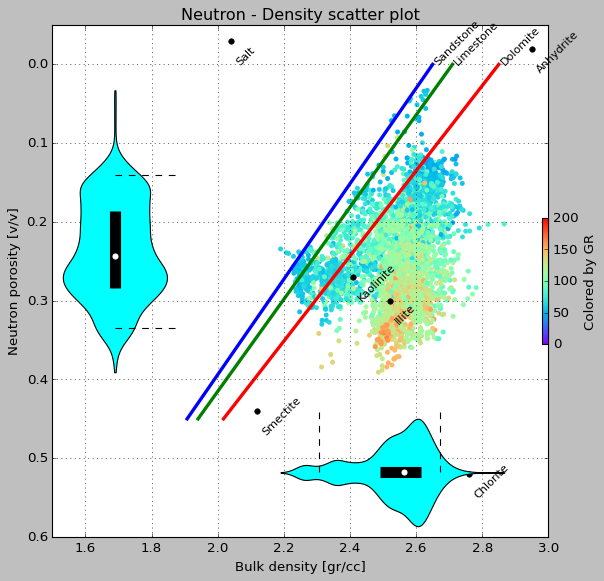

In [170]:
fig = plt.figure(figsize=(8,8))


ax1=fig.add_subplot(3, 3, (1, 9))
ax0=fig.add_subplot(3, 3, (1, 7))
#ax2=fig.add_subplot(3, 3, (7, 7))
ax3=fig.add_subplot(3, 3, (7, 9))
ax4=fig.add_subplot(10, 10, (10, 100))
ax4.axis("off")

#Rock physics template
for litho in df.Lithology.unique():
    dflitho = df.loc[df["Lithology"] == litho]
    if dflitho["Lithology"].count() > 1:
        ax1.plot(dflitho["Bulk density"], dflitho["Neutron porosity"], "-", lw=3, label=litho)
        ax1.annotate(litho, (dflitho["Bulk density"].iloc[0], dflitho["Neutron porosity"].iloc[0]), rotation=45, fontsize="small")
    else:
        ax1.plot(dflitho["Bulk density"], dflitho["Neutron porosity"], "o", c="k", ms=5, label=litho)
        ax1.annotate(litho, (dflitho["Bulk density"]+0.01, dflitho["Neutron porosity"]+0.03), rotation=45, fontsize="small")
        #bbox={'facecolor': 'white', "edgecolor": "white", 'alpha': 1, 'pad': 10}

#Log data
ax1.set_title("Neutron - Density scatter plot")
scatter = ax1.scatter(logs["RHOB"], logs["NPHI"], c=logs["GR"], cmap="rainbow", vmin=0, vmax=200, s=20, alpha=1, label="Logs", linewidth=0)
#ax1.hlines(logs["NPHI"].quantile(0.05),1.5, 3, ls="--", color="k", lw=1)
#ax1.hlines(logs["NPHI"].quantile(0.95),1.5, 3, ls="--", color="k", lw=1)
#ax1.vlines(logs["RHOB"].quantile(0.05),0.6,-0.05, ls="--", color="k", lw=1)
#ax1.vlines(logs["RHOB"].quantile(0.95),0.6,-0.05, ls="--", color="k", lw=1)
#ax1.axis("off")

ax1.set_xlabel("Bulk density [gr/cc]")
ax1.set_ylabel("Neutron porosity [v/v]")

ax1.set_xlim(1.5, 3)
ax1.set_ylim(0.6, -0.05)
ax1.grid(True)

#ax0.set_title("Nphi distribution")
violins0 = ax0.violinplot(logs["NPHI"].dropna(), vert=True, showextrema=False)
violins0["bodies"][0].set_facecolor("cyan")
violins0["bodies"][0].set_edgecolor("black")
violins0["bodies"][0].set_alpha(1)

ax0.scatter(1, logs["NPHI"].median(), color="white", zorder=3)
ax0.vlines(1, logs["NPHI"].quantile(0.25), logs["NPHI"].quantile(0.75), color="k", lw=10)
ax0.hlines(logs["NPHI"].quantile(0.05), 1, 1.3, color="k", lw=1, ls="--")
ax0.hlines(logs["NPHI"].quantile(0.95), 1, 1.3, color="k", lw=1, ls="--")

ax0.set_ylim(0.6, -0.05)

ax0.axis("off")

#ax2.hist(logs["GR"].dropna())
#ax2.set_xlim(0, 200)

#ax3.set_title("Rhob distribution")
violins1 = ax3.violinplot(logs["RHOB"].dropna(), vert=False, showextrema=False)
violins1["bodies"][0].set_facecolor("cyan")
violins1["bodies"][0].set_edgecolor("black")
violins1["bodies"][0].set_alpha(1)

ax3.scatter(logs["RHOB"].median(), 1, color="white", zorder=3)
ax3.hlines(1, logs["RHOB"].quantile(0.25), logs["RHOB"].quantile(0.75), color="k", lw=10)
ax3.vlines(logs["RHOB"].quantile(0.05), 1, 1.3, color="k", lw=1, ls="--")
ax3.vlines(logs["RHOB"].quantile(0.95), 1, 1.3, color="k", lw=1, ls="--")
ax3.set_xlim(1.5, 3)

ax3.axis("off")

#fig.tight_layout(pad=3)
fig.colorbar(scatter, ax=ax4, location="right", cmap="rainbow", shrink=0.3, label="Colored by GR")
plt.show()